# Решения задачи Коши системы из двух дифференциальных уравнений.

Будем решать ОДУ методом Рунге-Кутты четвертого порядка. Есть система из двух уравнений с начальными условиями:
$$\begin{equation*}
  \begin{cases}
  \frac{dx}{dt} = f(x, y, t)
  \\
 \frac{dy}{dt} = g(x, y, t)
 \\
 x(0) = x_0
 \\
 y(0) = y_0
 \\
\end{cases}
\end{equation*}$$

Тогда:
$$ x(0) = x_0 $$
$$ y(0) = y_0 $$


$$ x_{k+1} = x_{k} + \frac{k_0 + 2 \cdot k_1 + 2 \cdot k_2 + k_3}{6}$$
$$ y_{k+1} = y_{k} + \frac{q_0 + 2 \cdot q_1 + 2 \cdot q_2 + q_3}{6},$$
где
$$ h = t_{k+1} - t_{k} $$

$$ k_0 = f(t_k, x_k, y_k) \cdot h $$

$$ q_0 = g(t_k, x_k, y_k) \cdot h$$

$$ k_1 = f(t_k + \frac{h}{2}, x_k + \frac{k_0}{2}, y_k + \frac{q_0}{2}) \cdot h $$

$$ q_1 = g(t_k + \frac{h}{2}, x_k + \frac{k_0}{2}, y_k + \frac{q_0}{2}) \cdot h $$

$$ k_2 = f(t_k + \frac{h}{2}, x_k + \frac{k_1}{2}, y_k + \frac{q_1}{2}) \cdot h $$

$$ q_2 = g(t_k + \frac{h}{2}, x_k + \frac{k_1}{2}, y_k + \frac{q_1}{2}) \cdot h $$

$$ k_3 = f(t_k + h, x_k + k_2, y_k + q_2) \cdot h $$

$$ q_3 = g(t_k + h, x_k + k_2, y_k + q_2) \cdot h $$

In [1]:
from __future__ import division
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def RungeKutta(func_f, func_g, t0, x0, y0, tEnd, h):
    def f(func_f, t, x, y):
        try:
            return eval(func_f)
        except ZeroDivisionError:
            return 0
        
    def g(func_g, t, x, y):
        try:
            return eval(func_g)
        except ZeroDivisionError:
            return 0
    
    def increment(func_f, func_g, t, x, y, h):
        k0 = h * f(func_f, t, x, y)
        q0 = h * g(func_g, t, x, y)
        
        k1 = h * f(func_f, t + h/2, x + k0/2, y + q0/2)
        q1 = h * g(func_g, t + h/2, x + k0/2, y + q0/2)
        
        k2 = h * f(func_f, t + h/2, x + k1/2, y + q1/2)
        q2 = h * g(func_g, t + h/2, x + k1/2, y + q1/2)
        
        k3 = h * f(func_f, t + h, x + k2, y + q2)
        q3 = h * g(func_g, t + h, x + k2, y + 2)
        
        return ((k0 + 2*k1 + 2*k2 + k3) / 6, (q0 + 2*q1 + 2*q2 + q3)/6)
    t = []
    x = []
    y = []
    t.append(t0)
    x.append(x0)
    y.append(y0)
    while t0 < tEnd:
        h = min(h, tEnd - t0)
        x1, y1 = increment(func_f, func_g, t0, x0, y0, h)
        x0 += x1
        y0 += y1
        t0 += h
        t.append(t0)
        x.append(x0)
        y.append(y0)
    return np.array(t), np.array(x), np.array(y)

Решим систему уравнений: $$\begin{equation*}
 \begin{cases}
   x' = y, 
   \\
   y' = cos(3t)-4x,
   \\
   x(0) = 1,
   \\
   y(0) = 0
 \end{cases}
\end{equation*}$$

In [3]:
func_f = "y"
func_g = "np.cos(3*t)-4*x"
t0     = 0
x0     = 1
y0     = 0
tEnd   = 4*np.pi
h      = 0.01
t, x, y = RungeKutta(func_f, func_g, t0, x0, y0, tEnd, h)

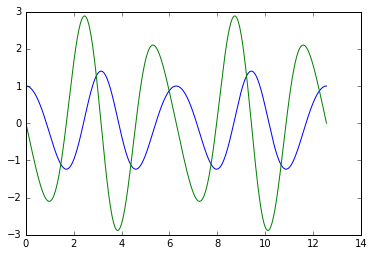

In [4]:
plt.plot(t, x)
plt.plot(t, y)

Истиное решение данной системы:
$$x(t) = \frac{6 \cdot (cos(2t) - cos(3t))}{5}$$
$$y(t) = \frac{3 \cdot (sin(3t) - 4sin(2t))}{5}$$

In [5]:
def x_true(t):
    return (6/5) * (np.cos(2 * t) - np.cos(3 * t))

def y_true(t):
    return (3/5) * (np.sin(3 * t) - 4*np.sin(2 * t))

In [6]:
t, x, y = RungeKutta(func_f, func_g, t0, x0, y0, tEnd, h)
x_real = [x_true(i) for i in t]
y_real = [y_true(i) for i in t]

Фазовый портрет:

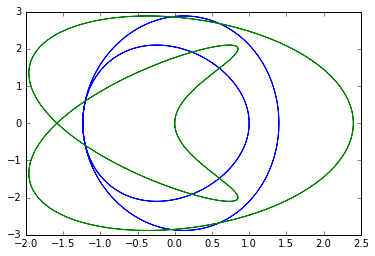

In [7]:
plt.plot(x, y, color='blue')
plt.plot(x_real, y_real, color='green')
plt.show()

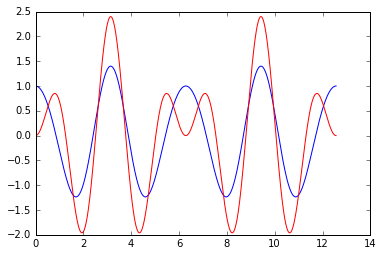

In [8]:
plt.plot(t, x, color='blue')
plt.plot(t, x_real, color='red')

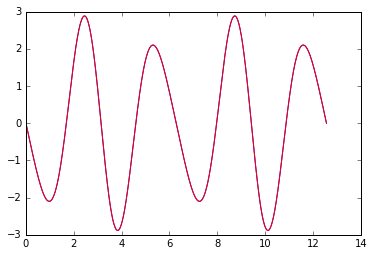

In [9]:
plt.plot(t, y, color='blue')
plt.plot(t, y_real, color='red')

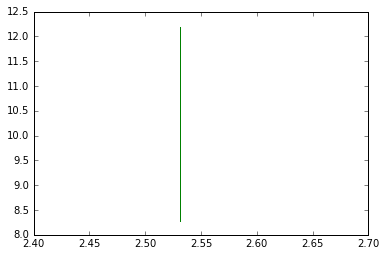

In [10]:
x_plt = []
y_plt_x = []
y_plt_y = []
for i in range(2, 1000, 10):
    h = i
    t, x, y = RungeKutta(func_f, func_g, t0, x0, y0, tEnd, h)
    x_real = np.array([x_true(i) for i in t])
    y_real = np.array([y_true(i) for i in t])
    x_plt.append(np.log(i))
    y_plt_x.append(np.log(np.abs(np.max(np.abs(x - x_real)))))
    y_plt_y.append(np.log(np.abs(np.max(np.abs(y - y_real)))))
plt.plot(x_plt, y_plt_x, color="blue")
plt.plot(x_plt, y_plt_y, color="green")
plt.show()